In [2]:
# Working on applied exercises to practice linear regression.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [3]:
Auto = pd.read_csv('/home/necati/machine_learning/ISLP/Datasets/Auto.csv')
Auto.shape

(397, 9)

In [4]:
Auto.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


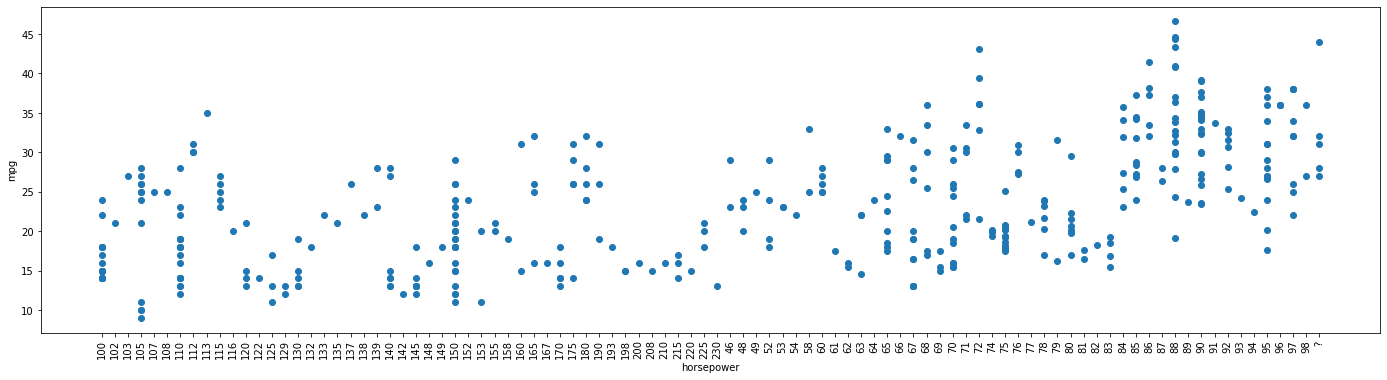

In [5]:
x = Auto['horsepower']
y = Auto['mpg']
plt.figure(figsize=(24,6))
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.scatter(sorted(x),y)
plt.xticks(rotation=90)
plt.show()
# Apparently values in the horsepower column are stored as strings or some other object. So the order is made lexigraphically.

In [6]:
# Convert the values of horsepower and mpg to numeric 
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')
Auto['mpg'] = pd.to_numeric(Auto['mpg'], errors='coerce')

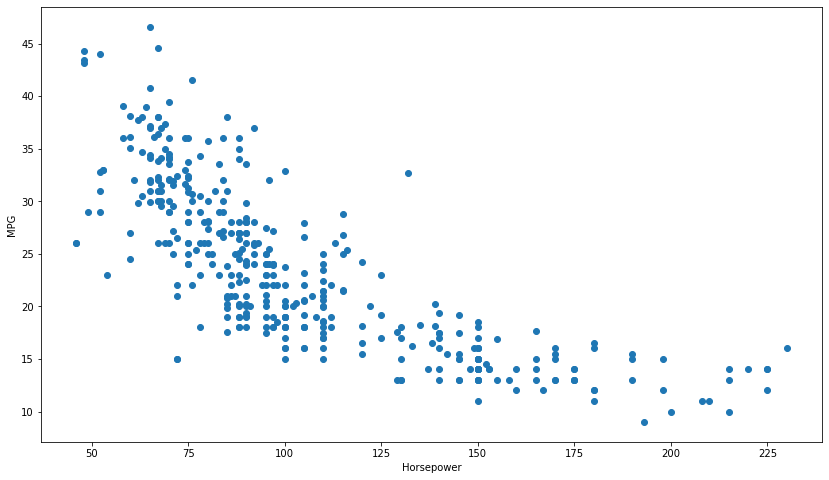

In [7]:
x1 = Auto['horsepower']
y1 = Auto['mpg']
plt.figure(figsize=(14,8))
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(x1, y1)
plt.show()

In [8]:
slope, intercept, r, p, std_err = stats.linregress(x1, y1)
print(r)

nan


In [9]:
print(x1.isna().sum())
print(y1.isna().sum())
#There are NaN values.

5
0


In [10]:
# Remove rows with NaN values in either 'horsepower' or 'mpg'
Auto_cleaned = Auto.dropna(subset=['horsepower', 'mpg'])
x1_cleaned = Auto_cleaned['horsepower']
y1_cleaned = Auto_cleaned['mpg']

# Perform the linear regression again
slope, intercept, r, p, std_err = stats.linregress(x1_cleaned, y1_cleaned)
print("Correlation coefficient:", r)
print(p, std_err)
p < 0.000000000000001

Correlation coefficient: -0.7784267838977758
7.031989029405463e-81 0.006445500517685034


True

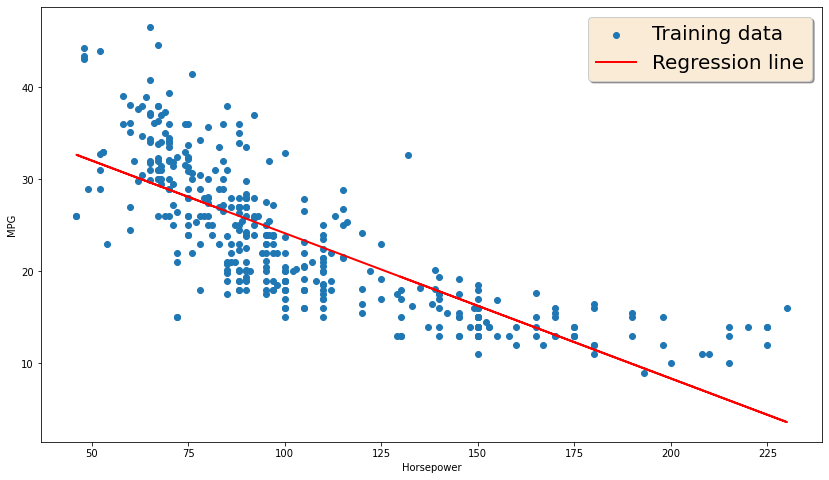

In [11]:
x1_cleaned = np.array(x1_cleaned)

# Create the model (predicted values) based on the linear regression
mymodel = slope * x1_cleaned + intercept  # NumPy array operations

plt.figure(figsize=(14,8))
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.scatter(x1_cleaned, y1_cleaned, label='Training data')

# Plot the linear regression line
plt.plot(x1_cleaned, mymodel, color='red', linewidth=2, label='Regression line')
plt.legend(fontsize=20, shadow=1, facecolor='antiquewhite')
plt.show()

In [21]:
# Now we will use sm.OLS() for the same problem.
x2 = Auto_cleaned['horsepower']
y2 = Auto_cleaned['mpg']

x2 = sm.add_constant(x2)

model = sm.OLS(y2, x2)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        00:58:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

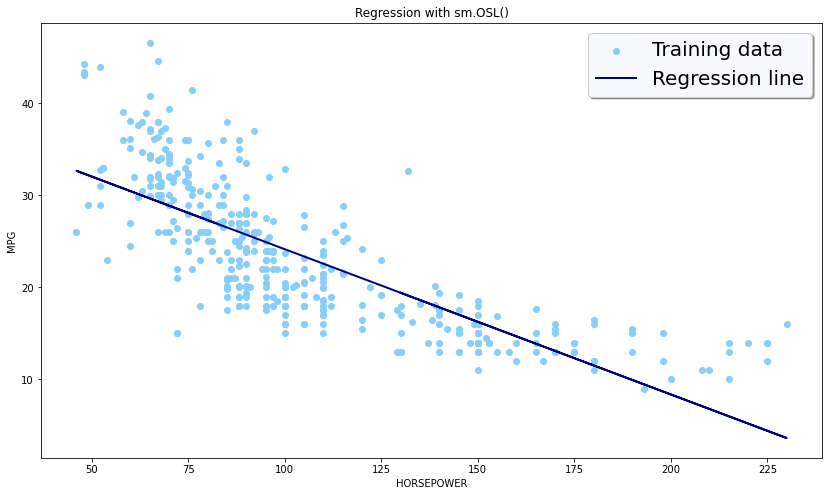

In [53]:
y2_predicted = result.fittedvalues
plt.figure(figsize=(14,8))
plt.title('Regression with sm.OSL()')
plt.xlabel('HORSEPOWER')
plt.ylabel('MPG')
plt.scatter(Auto_cleaned['horsepower'], y2, label= 'Training data', color='lightskyblue')
plt.plot(np.array(Auto_cleaned['horsepower']), np.array(y2_predicted), color = 'navy', linewidth = 2, label= 'Regression line')
plt.legend(fontsize=20, shadow=1, facecolor='ghostwhite')
plt.show()